Цель задания: изучить работу с готовыми моделями из torchvision.

Контекст
Вам необходимо подобрать базовую модель для работы по вашей задаче. Вы пробуете обучать различные модели на “ваших” данных. По результатам отберёте лучшую для дальнейшего обучения.

Задание
Вам необходимо провести эксперименты по начальному обучению различных моделей и сравнить результаты.

Возьмите датасет EMNIST из torchvision
Обучите на нём модели: ResNet 18, VGG 16, Inception v3, DenseNet 161 (с нуля по 10 эпох)
Сведите результаты обучения моделей (графики лоса) в таблицу и сравните их.
Задание со звездочкой*
Выполните то же задание, используя датасет hymenoptera_data

Инструкция к выполнению задания

Загрузите датасет, посмотрите примеры картинок в нём и проверьте наличествующие классы и их дисбаланс.
Создайте модель текущего типа, используя интерфейс torchvision для нужного количества классов.
Обучите модель с нуля 10 эпох. Фиксируйте значение функции потерь в список для последующего отображения.
Повторите пункты 2 и 3 для всех указанных вариантов моделей.
Формат сдачи работы
Прикрепите ссылку на готовое решение в личном кабинете. Работу можно отправлять в виде ссылки на python-ноутбук из GitHub, Google Colaboratory или аналогичных платформ. Не забудьте открыть доступ на просмотр и комментирование.

Критерии оценивания
По итогу выполнения задания вы получите зачёт.

Задание считается выполненным, если:

вы обучили каждую модель до некоторого улучшения качества
составлена таблица обучения для сравнения
Задание будет отправлено на доработку, если:

использованы не все типы моделей
не составлена сводная таблица с результатами

In [ ]:
import torch
from torch import nn
import torchvision as tv
from torchsummary import summary
import time

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


## DataSet

In [ ]:
split_lst = ['byclass', 'bymerge', 'balanced', 'letters', 'digits', 'mnist']
def show_img_with_lbl(lst):
    for spl in lst:
      batch_size=16
      dset_tr = tv.datasets.EMNIST(root="./data", split=spl, download=True, train=True,
                                      transform=tv.transforms.Compose([lambda img: tv.transforms.functional.rotate(img, -90),
                                                                    tv.transforms.RandomHorizontalFlip(p=1),
                                                                    tv.transforms.ToTensor()]))
      dset_loader = torch.utils.data.DataLoader(dset_tr, batch_size=batch_size)
      i, (image, label) = next(enumerate(dset_loader))
      imshow(tv.utils.make_grid(image))
      print(f'GroundTruth: {spl}', ' '.join('%5s' % dset_tr.classes[label[j]] for j in range(batch_size)))

      uniq = dset_tr.targets.unique(return_counts=True)
      print (f"классов: {len(dset_tr.classes)} {uniq[0].shape}, картинок: {uniq[1].sum().item()}")
      kl, vl = uniq[0].numpy(),uniq[1].numpy()
      print (f'\n\nминимальное значение для класса: {min(vl)} \nмаксимальное значение для класса: {max(vl)}\n\n')
      for k, v in zip(kl, vl ):
         print (f'класс: {k} колличество: {v}')


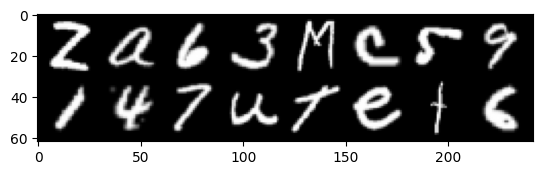

GroundTruth: byclass     Z     a     6     3     M     c     5     9     l     4     7     u     T     e     t     6
классов: 62 torch.Size([62]), картинок: 697932


минимальное значение для класса: 1896 
максимальное значение для класса: 38374


класс: 0 колличество: 34585
класс: 1 колличество: 38374
класс: 2 колличество: 34203
класс: 3 колличество: 35143
класс: 4 колличество: 33535
класс: 5 колличество: 31416
класс: 6 колличество: 34232
класс: 7 колличество: 35754
класс: 8 колличество: 33946
класс: 9 колличество: 33847
класс: 10 колличество: 6407
класс: 11 колличество: 3878
класс: 12 колличество: 10094
класс: 13 колличество: 4562
класс: 14 колличество: 4934
класс: 15 колличество: 9182
класс: 16 колличество: 2517
класс: 17 колличество: 3152
класс: 18 колличество: 11946
класс: 19 колличество: 3762
класс: 20 колличество: 2468
класс: 21 колличество: 5076
класс: 22 колличество: 9002
класс: 23 колличество: 8237
класс: 24 колличество: 24983
класс: 25 колличество: 8347
класс: 26 колличество:

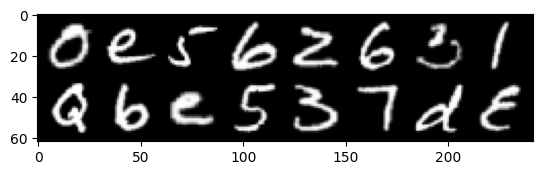

GroundTruth: bymerge     O     a     5     6     Z     6     3     1     Q     b     e     5     3     7     d     E
классов: 47 torch.Size([47]), картинок: 697932


минимальное значение для класса: 2534 
максимальное значение для класса: 38304


класс: 0 колличество: 34618
класс: 1 колличество: 38304
класс: 2 колличество: 34307
класс: 3 колличество: 35285
класс: 4 колличество: 33656
класс: 5 колличество: 31280
класс: 6 колличество: 34150
класс: 7 колличество: 36020
класс: 8 колличество: 33924
класс: 9 колличество: 33882
класс: 10 колличество: 6411
класс: 11 колличество: 3874
класс: 12 колличество: 12963
класс: 13 колличество: 4606
класс: 14 колличество: 4925
класс: 15 колличество: 9098
класс: 16 колличество: 2534
класс: 17 колличество: 3097
класс: 18 колличество: 14733
класс: 19 колличество: 5689
класс: 20 колличество: 4998
класс: 21 колличество: 20381
класс: 22 колличество: 11612
класс: 23 колличество: 8237
класс: 24 колличество: 27664
класс: 25 колличество: 10748
класс: 26 колличест

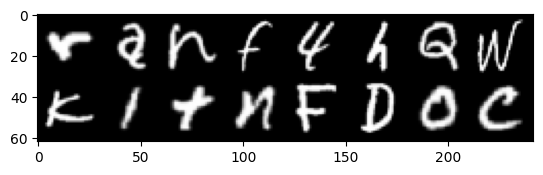

GroundTruth: balanced     r     a     n     F     4     h     Q     W     K     1     t     n     F     D     O     C
классов: 47 torch.Size([47]), картинок: 112800


минимальное значение для класса: 2400 
максимальное значение для класса: 2400


класс: 0 колличество: 2400
класс: 1 колличество: 2400
класс: 2 колличество: 2400
класс: 3 колличество: 2400
класс: 4 колличество: 2400
класс: 5 колличество: 2400
класс: 6 колличество: 2400
класс: 7 колличество: 2400
класс: 8 колличество: 2400
класс: 9 колличество: 2400
класс: 10 колличество: 2400
класс: 11 колличество: 2400
класс: 12 колличество: 2400
класс: 13 колличество: 2400
класс: 14 колличество: 2400
класс: 15 колличество: 2400
класс: 16 колличество: 2400
класс: 17 колличество: 2400
класс: 18 колличество: 2400
класс: 19 колличество: 2400
класс: 20 колличество: 2400
класс: 21 колличество: 2400
класс: 22 колличество: 2400
класс: 23 колличество: 2400
класс: 24 колличество: 2400
класс: 25 колличество: 2400
класс: 26 колличество: 2400
класс: 

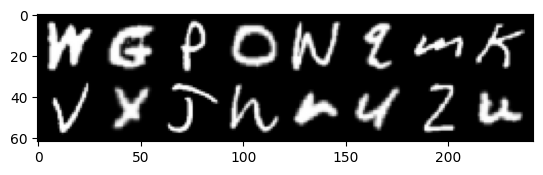

GroundTruth: letters     w     g     p     o     w     q     m     k     v     x     j     n     r     u     z     u
классов: 27 torch.Size([26]), картинок: 124800


минимальное значение для класса: 4800 
максимальное значение для класса: 4800


класс: 1 колличество: 4800
класс: 2 колличество: 4800
класс: 3 колличество: 4800
класс: 4 колличество: 4800
класс: 5 колличество: 4800
класс: 6 колличество: 4800
класс: 7 колличество: 4800
класс: 8 колличество: 4800
класс: 9 колличество: 4800
класс: 10 колличество: 4800
класс: 11 колличество: 4800
класс: 12 колличество: 4800
класс: 13 колличество: 4800
класс: 14 колличество: 4800
класс: 15 колличество: 4800
класс: 16 колличество: 4800
класс: 17 колличество: 4800
класс: 18 колличество: 4800
класс: 19 колличество: 4800
класс: 20 колличество: 4800
класс: 21 колличество: 4800
класс: 22 колличество: 4800
класс: 23 колличество: 4800
класс: 24 колличество: 4800
класс: 25 колличество: 4800
класс: 26 колличество: 4800


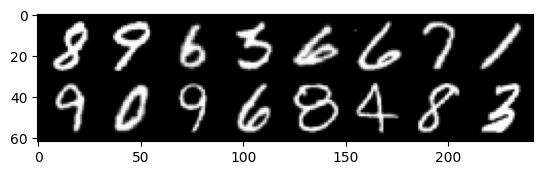

GroundTruth: digits     8     9     6     3     6     6     7     1     9     0     9     6     8     4     8     3
классов: 10 torch.Size([10]), картинок: 240000


минимальное значение для класса: 24000 
максимальное значение для класса: 24000


класс: 0 колличество: 24000
класс: 1 колличество: 24000
класс: 2 колличество: 24000
класс: 3 колличество: 24000
класс: 4 колличество: 24000
класс: 5 колличество: 24000
класс: 6 колличество: 24000
класс: 7 колличество: 24000
класс: 8 колличество: 24000
класс: 9 колличество: 24000


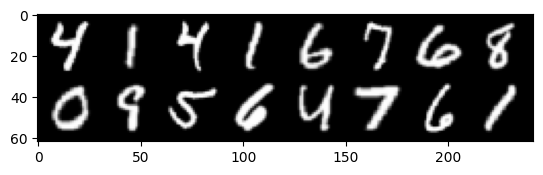

GroundTruth: mnist     4     1     4     1     6     7     6     8     0     9     5     6     4     7     6     1
классов: 10 torch.Size([10]), картинок: 60000


минимальное значение для класса: 6000 
максимальное значение для класса: 6000


класс: 0 колличество: 6000
класс: 1 колличество: 6000
класс: 2 колличество: 6000
класс: 3 колличество: 6000
класс: 4 колличество: 6000
класс: 5 колличество: 6000
класс: 6 колличество: 6000
класс: 7 колличество: 6000
класс: 8 колличество: 6000
класс: 9 колличество: 6000


In [ ]:
show_img_with_lbl(split_lst)

EMNIST ByClass: 697 932 characters. 62 unbalanced classes.

EMNIST ByMerge: 697 932 characters. 47 unbalanced classes.

EMNIST Balanced: 112 800 characters. 47 balanced classes.

EMNIST Letters: 124 800 characters. 26 balanced classes.

EMNIST Digits: 240 000 characters. 10 balanced classes.

EMNIST MNIST: 60 000 characters. 10 balanced classes.

<font color=green size=3>
Видим, что полных набора 3.
<br>
Из них:
<br>
<br>
EMNIST Balanced - специально сбалансированный, для облегчения обучения.
<br>
EMNIST ByClass - самый полный  и несбалансированный.
<br>
Будем использовать и тот и другой, чтобы посмотреть на разницу для обучения.
<br>
</font>

In [ ]:
BATCH_SIZE = 256
transoforms = tv.transforms.Compose([
    tv.transforms.Grayscale(3), # предобученные модели работают с 3х канальными рисунками, поэтому искусственно делаем из одного три канала
    tv.transforms.Resize((224, 224)), # трансформируем наши изображения до требуемого размера
    tv.transforms.ToTensor()
])
train_dataset_bc = tv.datasets.EMNIST(root="./data", split='byclass', train=True, transform=transoforms, download=True)
test_dataset_bc = tv.datasets.EMNIST(root="./data", split='byclass', train=False, transform=transoforms, download=True)
train_iter_bc = torch.utils.data.DataLoader(train_dataset_bc, batch_size=BATCH_SIZE)
test_iter_bc = torch.utils.data.DataLoader(test_dataset_bc, batch_size=BATCH_SIZE)

train_dataset_bl = tv.datasets.EMNIST(root="./data", split='balanced', train=True, transform=transoforms, download=True)
test_dataset_bl = tv.datasets.EMNIST(root="./data", split='balanced', train=False, transform=transoforms, download=True)
train_iter_bl = torch.utils.data.DataLoader(train_dataset_bl, batch_size=BATCH_SIZE)
test_iter_bl = torch.utils.data.DataLoader(test_dataset_bl, batch_size=BATCH_SIZE)

<font color=green size=3>
Это шаблон примечания
<br>
<br>
</font>